In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


In [4]:
df.to_csv("B:/SentimentAnalysis/BA_reviews.csv")

Loading the Dataset

In [5]:
import pandas as pd

file_path = 'B:/SentimentAnalysis/BA_reviews.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | If you can’t fly First Class...
1,1,Not Verified | Singapore to Heathrow. Busine...
2,2,Not Verified | I reported my damaged/ruined ...
3,3,"Not Verified | On March 1st, I flew from Ber..."
4,4,Not Verified | The WORST customer experience! ...


Data Cleaning

In [8]:
df = df.dropna(subset=['reviews'])

import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

df['cleaned_review'] = df['reviews'].apply(clean_text)

df.head()

,Unnamed: 0,reviews,cleaned_review
0,0,✅ Trip Verified | If you can’t fly First Class...,Trip Verified If you cant fly First Class don...
1,1,Not Verified | Singapore to Heathrow. Busine...,Not Verified Singapore to Heathrow Business c...
2,2,Not Verified | I reported my damaged/ruined ...,Not Verified I reported my damagedruined suit...
3,3,"Not Verified | On March 1st, I flew from Ber...",Not Verified On March 1st I flew from Berlin ...
4,4,Not Verified | The WORST customer experience! ...,Not Verified The WORST customer experience Br...


Sentiment Analysis

In [9]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

df[['cleaned_review', 'sentiment']].head()

,cleaned_review,sentiment
0,Trip Verified If you cant fly First Class don...,-0.132353
1,Not Verified Singapore to Heathrow Business c...,-0.174722
2,Not Verified I reported my damagedruined suit...,-0.342857
3,Not Verified On March 1st I flew from Berlin ...,0.028333
4,Not Verified The WORST customer experience Br...,0.009028


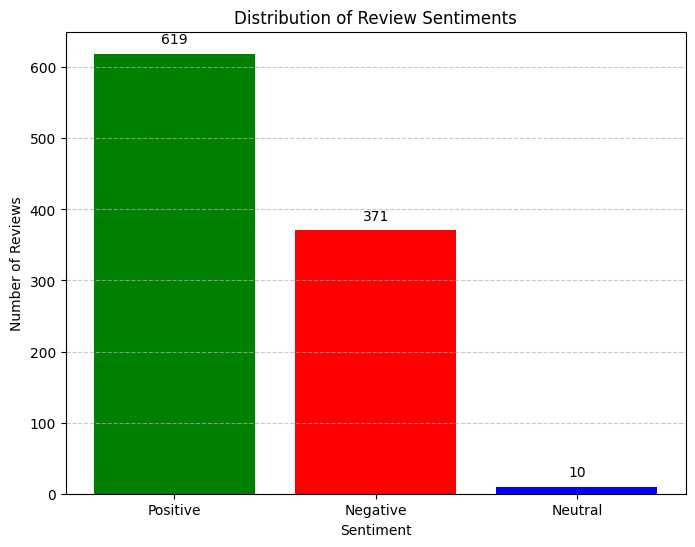

Bar chart saved to B:/SentimentAnalysis/sentiment_distribution.png


In [10]:
import matplotlib.pyplot as plt

positive_reviews = df[df['sentiment'] > 0].shape[0]
negative_reviews = df[df['sentiment'] < 0].shape[0]
neutral_reviews = df[df['sentiment'] == 0].shape[0]

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_reviews, negative_reviews, neutral_reviews]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'red', 'blue'])
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

bar_chart_path = 'B:/SentimentAnalysis/sentiment_distribution.png'
plt.savefig(bar_chart_path)
plt.show()

print(f"Bar chart saved to {bar_chart_path}")

Word Cloud

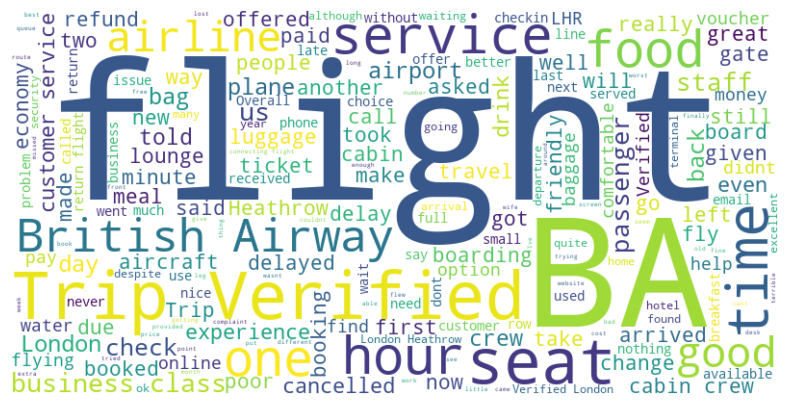

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(df['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()